# Análisis EDA de productores autorizados 2023

# 1. Importación de librerías y carga de datos

In [66]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
# pd.set_option('display.max_columns', None)

In [67]:
lista_productores = pd.read_csv('../../data/listado_productores_complete.csv')

In [68]:
lista_productores.shape

(1525720, 12)

# 2. Análisis Inicial

## 2.1 Estructura de los datos

In [26]:
lista_productores.head()

,ESTADO,MUNICIPIO,NOM_MUN,NOM_ENT,CVE_ENT,CVE_MUN,ACUSE,APELLIDO PATERNO,APELLIDO MATERNO,NOMBRE (S),PAQUETE,KEY_inegi
0,AGUASCALIENTES,AGUASCALIENTES,Aguascalientes,Aguascalientes,1.0,1.0,23-PRONAFE-FERT-000510-S000-AS,AGUILAR,AGUILAR,NICOLAS,2,aguascalientes-aguascalientes
1,AGUASCALIENTES,AGUASCALIENTES,Aguascalientes,Aguascalientes,1.0,1.0,23-PRONAFE-FERT-000339-S000-AS,AGUILAR,GARCIA,MANUEL,2,aguascalientes-aguascalientes
2,AGUASCALIENTES,AGUASCALIENTES,Aguascalientes,Aguascalientes,1.0,1.0,23-PRONAFE-FERT-000340-S000-AS,AGUILAR,GARCIA,PAULO,2,aguascalientes-aguascalientes
3,AGUASCALIENTES,AGUASCALIENTES,Aguascalientes,Aguascalientes,1.0,1.0,23-PRONAFE-FERT-000511-S000-AS,AGUILAR,OROPEZA,MIGUEL,2,aguascalientes-aguascalientes
4,AGUASCALIENTES,AGUASCALIENTES,Aguascalientes,Aguascalientes,1.0,1.0,23-PRONAFE-FERT-000676-S000-AS,ALBA,ESTRADA,MARIA DEL ROSARIO,2,aguascalientes-aguascalientes


In [27]:
lista_productores.tail()

,ESTADO,MUNICIPIO,NOM_MUN,NOM_ENT,CVE_ENT,CVE_MUN,ACUSE,APELLIDO PATERNO,APELLIDO MATERNO,NOMBRE (S),PAQUETE,KEY_inegi
1525715,PUEBLA,ZOQUITLAN,Zoquitlán,Puebla,21.0,217.0,23-PRONAFE-FERT-103370-S000-PL,NaN,NaN,NaN,2,puebla-zoquitlan
1525716,PUEBLA,ZOQUITLAN,Zoquitlán,Puebla,21.0,217.0,23-PRONAFE-FERT-103371-S000-PL,NaN,NaN,NaN,2,puebla-zoquitlan
1525717,PUEBLA,ZOQUITLAN,Zoquitlán,Puebla,21.0,217.0,23-PRONAFE-FERT-103166-S000-PL,NaN,NaN,NaN,2,puebla-zoquitlan
1525718,PUEBLA,ZOQUITLAN,Zoquitlán,Puebla,21.0,217.0,23-PRONAFE-FERT-103373-S000-PL,NaN,NaN,NaN,2,puebla-zoquitlan
1525719,PUEBLA,ZOQUITLAN,Zoquitlán,Puebla,21.0,217.0,23-PRONAFE-FERT-103374-S000-PL,NaN,NaN,NaN,2,puebla-zoquitlan


## 2.2 Información general

In [69]:
lista_productores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525720 entries, 0 to 1525719
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   ESTADO            1525720 non-null  object 
 1   MUNICIPIO         1450208 non-null  object 
 2   NOM_MUN           1415224 non-null  object 
 3   NOM_ENT           1415224 non-null  object 
 4   CVE_ENT           1415224 non-null  float64
 5   CVE_MUN           1415224 non-null  float64
 6   ACUSE             1525720 non-null  object 
 7   APELLIDO PATERNO  1521426 non-null  object 
 8   APELLIDO MATERNO  1497507 non-null  object 
 9   NOMBRE (S)        1521427 non-null  object 
 10  PAQUETE           1525720 non-null  int64  
 11  KEY_inegi         1415224 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 139.7+ MB


## 2.3 Estadísticas Descriptivas

In [70]:
# Obtener estadísticas descriptivas para todas las variables
descriptive_stats = lista_productores.describe(include='all').transpose()

# Mostrar las estadísticas descriptivas
print(descriptive_stats)

                      count   unique                             top    freq  \
ESTADO              1525720       20                        GUERRERO  356223   
MUNICIPIO           1450208     1694                  LAS MARGARITAS   19497   
NOM_MUN             1415224     1664                  Las Margaritas   19497   
NOM_ENT             1415224       17                        Guerrero  354841   
CVE_ENT           1415224.0      NaN                             NaN     NaN   
CVE_MUN           1415224.0      NaN                             NaN     NaN   
ACUSE               1525720  1525720  23-PRONAFE-FERT-000510-S000-AS       1   
APELLIDO PATERNO    1521426    13551                       HERNANDEZ   75301   
APELLIDO MATERNO    1497507    15970                       HERNANDEZ   75248   
NOMBRE (S)          1521427   116715                            JUAN   24614   
PAQUETE           1525720.0      NaN                             NaN     NaN   
KEY_inegi           1415224     1703    

# 3. Limpieza de Datos

## 3.1 Valores Nulos

In [30]:
# Algunos de estos valores nulos vienen de Veracruz de Ignacio de la Llave
valores_nulos = lista_productores.isna().sum()
print(valores_nulos)

ESTADO                   0
MUNICIPIO            75512
NOM_MUN             110496
NOM_ENT             110496
CVE_ENT             110496
CVE_MUN             110496
ACUSE                    0
APELLIDO PATERNO      4294
APELLIDO MATERNO     28213
NOMBRE (S)            4293
PAQUETE                  0
KEY_inegi           110496
dtype: int64


## 3.2 Decisiones sobre valores nulos

In [71]:
# Los nombres y apellidos paternos y maternos que están vacíos y tengan número de acuse se reemplazarán por 'unknown'
lista_productores.loc[(lista_productores['APELLIDO PATERNO'].isna()) & (
    lista_productores['ACUSE'].notna()), 'APELLIDO PATERNO'] = 'unknown'
lista_productores.loc[(lista_productores['APELLIDO MATERNO'].isna()) & (
    lista_productores['ACUSE'].notna()), 'APELLIDO MATERNO'] = 'unknown'
lista_productores.loc[
    (lista_productores['NOMBRE (S)'].isna()) & (lista_productores['ACUSE'].notna()), 'NOMBRE (S)'] = 'unknown'

In [72]:
duplicated_rows_productores = lista_productores['ACUSE'].duplicated()
number_of_duplicated_rows_productores = duplicated_rows_productores.sum()
print(f"El número de filas duplicadas es: {number_of_duplicated_rows_productores}")

El número de filas duplicadas es: 0


## 3.3 Valores Duplicados

In [73]:
# Filas completas duplicadas
filas_duplicadas = lista_productores.duplicated().sum()
print(f'Hay {filas_duplicadas} filas duplicadas')

Hay 0 filas duplicadas


Consultamos el número de filas duplicadas para columna.

In [65]:
for column in lista_productores.columns:
    duplicated_rows = lista_productores[column].duplicated()
    number_of_duplicated_rows = duplicated_rows.sum()
    print(f"El número de filas duplicadas en la columna {column} es: {number_of_duplicated_rows}")

El número de filas duplicadas en la columna ESTADO es: 1525700
El número de filas duplicadas en la columna MUNICIPIO es: 1524025
El número de filas duplicadas en la columna NOM_MUN es: 1524055
El número de filas duplicadas en la columna NOM_ENT es: 1525702
El número de filas duplicadas en la columna CVE_ENT es: 1525702
El número de filas duplicadas en la columna CVE_MUN es: 1525156
El número de filas duplicadas en la columna ACUSE es: 0
El número de filas duplicadas en la columna APELLIDO PATERNO es: 1512168
El número de filas duplicadas en la columna APELLIDO MATERNO es: 1509749
El número de filas duplicadas en la columna NOMBRE (S) es: 1409004
El número de filas duplicadas en la columna PAQUETE es: 1525718
El número de filas duplicadas en la columna KEY_inegi es: 1524016


In [74]:
# Valores duplicados en la columna nombre, apellido, municipio y estado
duplicated_rows = lista_productores.duplicated(subset=['APELLIDO PATERNO', 'APELLIDO MATERNO', 'NOMBRE (S)', 'MUNICIPIO', 'ESTADO'])
number_of_duplicated_rows = duplicated_rows.sum()
print(f"El número de filas duplicadas en las columnas 'APELLIDO PATERNO', 'APELLIDO MATERNO', 'NOMBRE (S)', 'MUNICIPIO' y 'ESTADO' es: {number_of_duplicated_rows}")
lista_productores[duplicated_rows]


El número de filas duplicadas en las columnas 'APELLIDO PATERNO', 'APELLIDO MATERNO', 'NOMBRE (S)', 'MUNICIPIO' y 'ESTADO' es: 46443


,ESTADO,MUNICIPIO,NOM_MUN,NOM_ENT,CVE_ENT,CVE_MUN,ACUSE,APELLIDO PATERNO,APELLIDO MATERNO,NOMBRE (S),PAQUETE,KEY_inegi
1336,AGUASCALIENTES,ASIENTOS,Asientos,Aguascalientes,1.0,2.0,23-PRONAFE-FERT-001979-S000-AS,GARCIA,RODRIGUEZ,J. JESUS,2,aguascalientes-asientos
1882,AGUASCALIENTES,ASIENTOS,Asientos,Aguascalientes,1.0,2.0,23-PRONAFE-FERT-002395-S000-AS,MORENO,HERNANDEZ,FILEMON,2,aguascalientes-asientos
3068,AGUASCALIENTES,COSIO,Cosío,Aguascalientes,1.0,4.0,23-PRONAFE-FERT-003115-S000-AS,RODRIGUEZ,GONZALEZ,JOSE,2,aguascalientes-cosio
4288,AGUASCALIENTES,JESUS MARIA,Jesús María,Aguascalientes,1.0,5.0,23-PRONAFE-FERT-004710-S000-AS,GARCIA,LOPEZ,DANIEL,1,aguascalientes-jesus maria
5762,AGUASCALIENTES,SAN JOSE DE GRACIA,San José de Gracia,Aguascalientes,1.0,8.0,23-PRONAFE-FERT-006232-S000-AS,GARCIA,RODRIGUEZ,J. CRUZ,1,aguascalientes-san jose de gracia
...,...,...,...,...,...,...,...,...,...,...,...,...
1525715,PUEBLA,ZOQUITLAN,Zoquitlán,Puebla,21.0,217.0,23-PRONAFE-FERT-103370-S000-PL,unknown,unknown,unknown,2,puebla-zoquitlan
1525716,PUEBLA,ZOQUITLAN,Zoquitlán,Puebla,21.0,217.0,23-PRONAFE-FERT-103371-S000-PL,unknown,unknown,unknown,2,puebla-zoquitlan
1525717,PUEBLA,ZOQUITLAN,Zoquitlán,Puebla,21.0,217.0,23-PRONAFE-FERT-103166-S000-PL,unknown,unknown,unknown,2,puebla-zoquitlan
1525718,PUEBLA,ZOQUITLAN,Zoquitlán,Puebla,21.0,217.0,23-PRONAFE-FERT-103373-S000-PL,unknown,unknown,unknown,2,puebla-zoquitlan


## 3.4 Decisiones sobre valores duplicados

## 3.5 Corrección de Tipos de Datos

In [14]:
lista_productores = lista_productores.astype({
    'ESTADO': 'str',
    'MUNICIPIO': 'str',
    'ACUSE': 'str',
    'APELLIDO PATERNO': 'str',
    'APELLIDO MATERNO': 'str',
    'NOMBRE (S)': 'str',
    'PAQUETE': 'int',
    'NOM_MUN': 'str',
    'NOM_ENT': 'str',
    'CVE_MUN': 'str',
    'CVE_ENT': 'str'
})

In [15]:
lista_productores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525720 entries, 0 to 1525719
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   ESTADO            1525720 non-null  object
 1   MUNICIPIO         1525720 non-null  object
 2   NOM_MUN           1525720 non-null  object
 3   NOM_ENT           1525720 non-null  object
 4   CVE_ENT           1525720 non-null  object
 5   CVE_MUN           1525720 non-null  object
 6   ACUSE             1525720 non-null  object
 7   APELLIDO PATERNO  1525720 non-null  object
 8   APELLIDO MATERNO  1525720 non-null  object
 9   NOMBRE (S)        1525720 non-null  object
 10  PAQUETE           1525720 non-null  int32 
 11  KEY_inegi         1415224 non-null  object
dtypes: int32(1), object(11)
memory usage: 133.9+ MB


# 4. Análisis Univariado

## 4.1 Variables Numéricas

En este caso, la única variable númerica es la de paquetes.

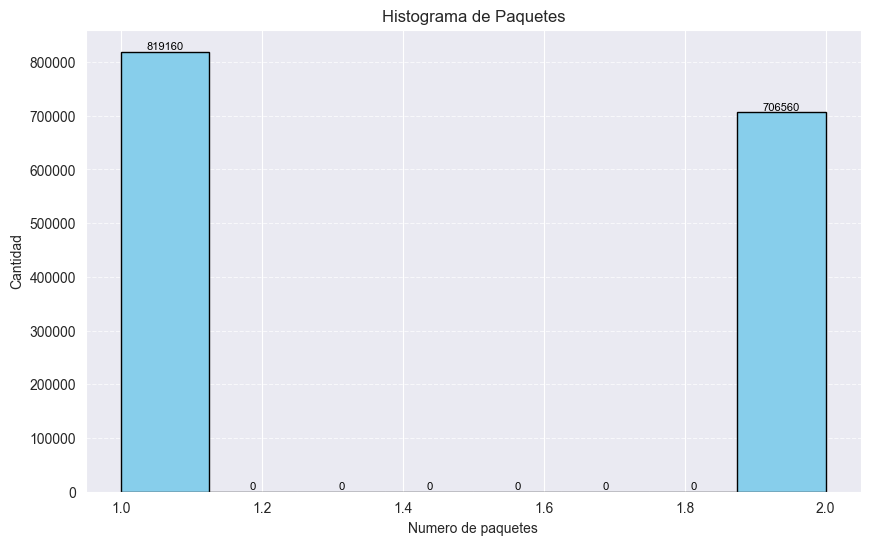

In [16]:
# Filtrar los datos para estar dentro del rango de interés
paquetes = lista_productores['PAQUETE']

# Crear el histograma con un mayor número de bins
plt.figure(figsize=(10, 6))
barras = plt.hist(paquetes,bins=8,color='skyblue', edgecolor='black')
plt.xlabel('Numero de paquetes')
plt.ylabel('Cantidad')
plt.title('Histograma de Paquetes')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Recorrer las barras
for i in range(len(barras[0])):
    # Obtener el valor de la barra
    valor = barras[0][i]

     # Calcular la posición x de la anotación como el centro de la barra
    bar_width = barras[1][1] - barras[1][0]  # Ancho de las barras
    x_pos = barras[1][i] + bar_width / 2  # Posición x del centro de la barra

    # Mostrar el valor encima de la barra
    plt.annotate(f"{valor:.0f}", xy=(x_pos, valor),
                 ha="center", va="bottom", fontsize=8, color="black")

plt.show()

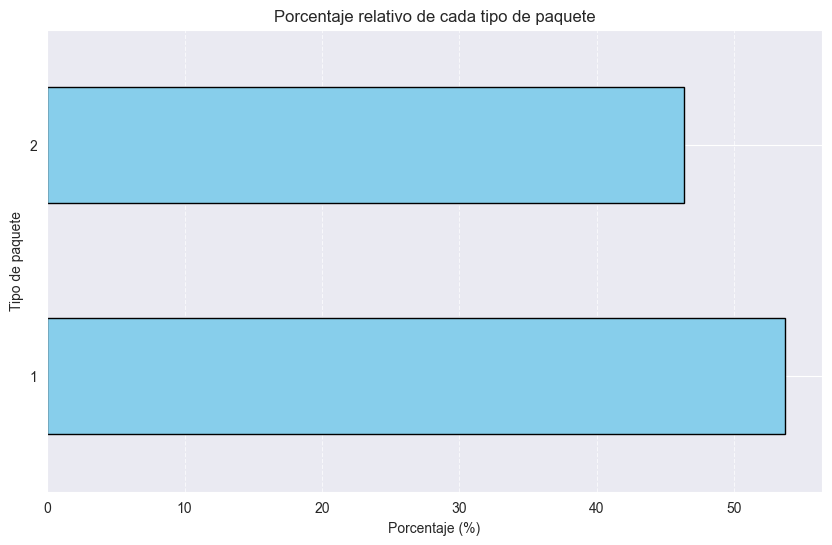

In [49]:
# Contar el número de cada tipo de 'PAQUETE'
grouped_df = lista_productores['PAQUETE'].value_counts()

# Calcular el porcentaje relativo de cada tipo de paquete
percentage_df = (grouped_df / grouped_df.sum()) * 100

# Crear el gráfico de barras apiladas
percentage_df.plot(kind='barh', stacked=True, color='skyblue', edgecolor='black', figsize=(10, 6))

plt.xlabel('Porcentaje (%)')
plt.ylabel('Tipo de paquete')
plt.title('Porcentaje relativo a solicitud de cantidad de paquete')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

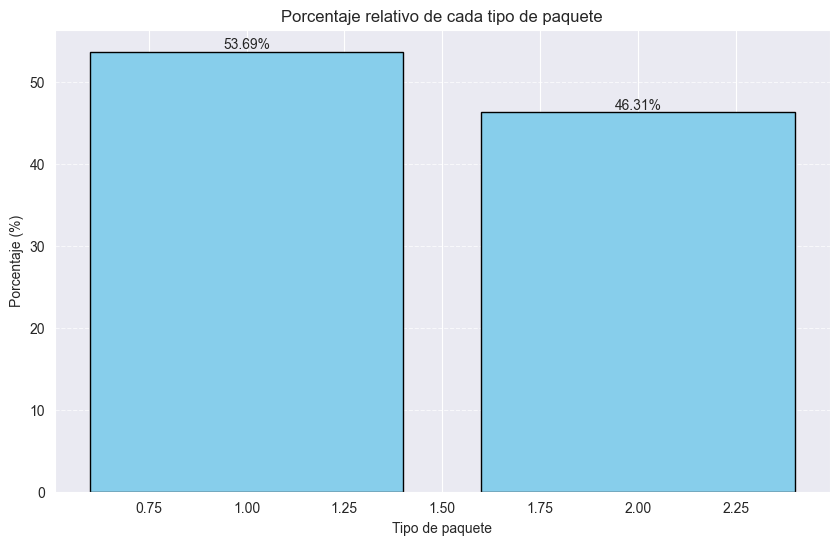

In [40]:
# Contar el número de cada tipo de 'PAQUETE'
grouped_df = lista_productores['PAQUETE'].value_counts()

# Calcular el porcentaje relativo de cada tipo de paquete
percentage_df = (grouped_df / grouped_df.sum()) * 100

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
barras = plt.bar(percentage_df.index, percentage_df.values, color='skyblue', edgecolor='black')
plt.xlabel('Tipo de paquete')
plt.ylabel('Porcentaje (%)')
plt.title('Porcentaje relativo de cada tipo de paquete')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir anotaciones a las barras
for bar in barras:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{bar.get_height():.2f}%',
             ha='center', va='bottom')

plt.show()

## 4.2 Variables Categóricas

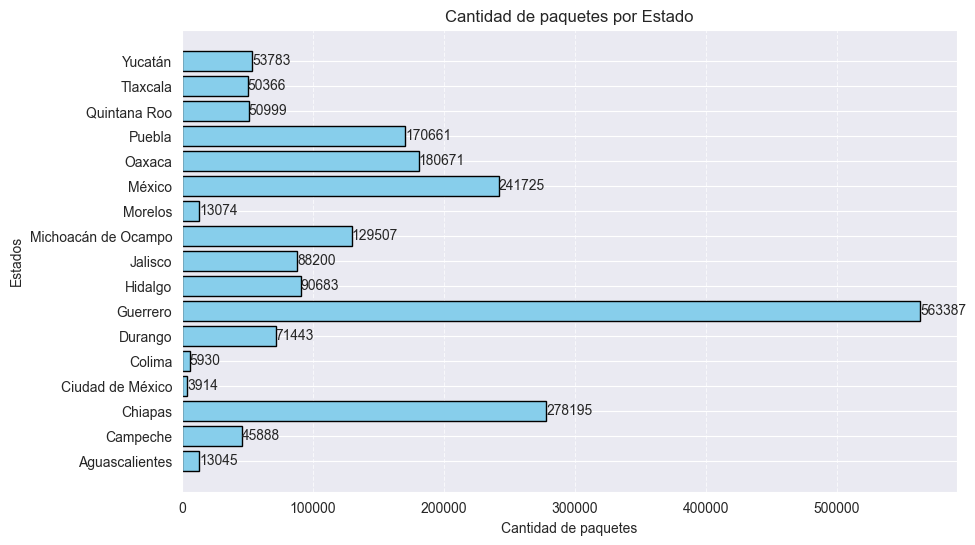

In [77]:
# Agrupar los datos por 'ESTADO' y sumar el número de 'PAQUETE'
grouped_df = lista_productores.groupby("NOM_ENT")["PAQUETE"].sum()
# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
barras = plt.barh(grouped_df.index, grouped_df.values, color='skyblue', edgecolor='black')
plt.xlabel('Cantidad de paquetes')
plt.ylabel('Estados')
plt.title('Cantidad de paquetes por Estado')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir anotaciones a las barras
for bar in barras:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.0f}', 
             va='center', ha='left')

plt.show()

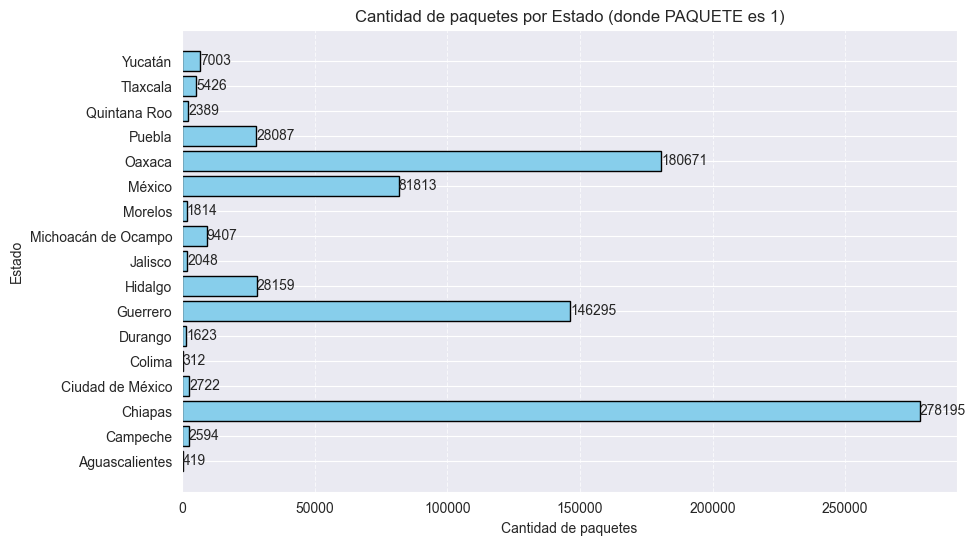

In [35]:
# Estado y numero de paquetes filtrar los datos donde la solicitud de'PAQUETE' es 1
lista_productores_filtrada = lista_productores[lista_productores['PAQUETE'] == 1]

# Agrupar los datos filtrados por 'ESTADO' y contar el número de 'PAQUETE'
grouped_df = lista_productores_filtrada.groupby("NOM_ENT")["PAQUETE"].count()

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
barras = plt.barh(grouped_df.index, grouped_df.values, color='skyblue', edgecolor='black')
plt.xlabel('Cantidad de paquetes')
plt.ylabel('Estado')
plt.title('Cantidad de paquetes solicitados igual 1 por Estado')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir anotaciones a las barras
for bar in barras:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.0f}', 
             va='center', ha='left')

plt.show()

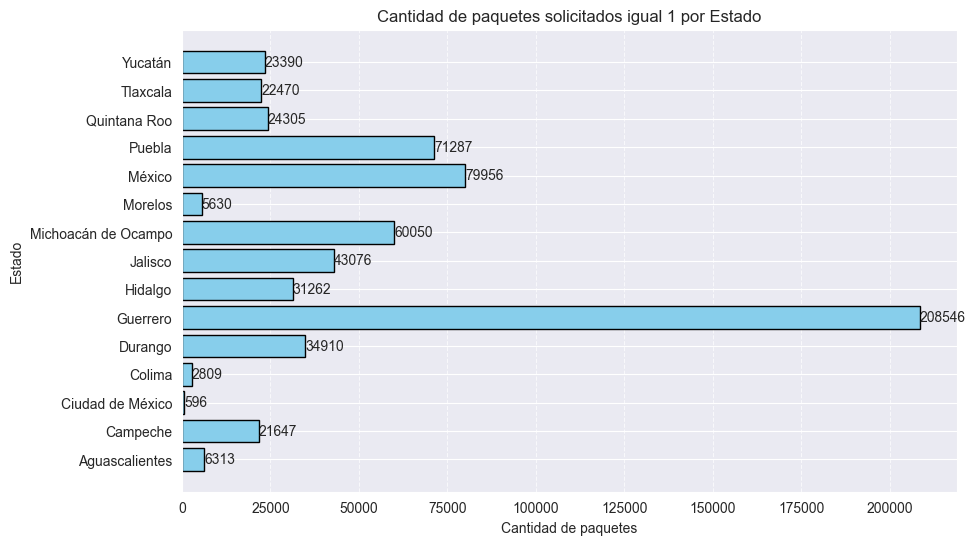

In [78]:
# Filtrar los datos donde 'PAQUETE' es 2
lista_productores_filtrada = lista_productores[lista_productores['PAQUETE'] == 2]

# Agrupar los datos filtrados por 'ESTADO' y contar el número de 'PAQUETE'
grouped_df = lista_productores_filtrada.groupby("NOM_ENT")["PAQUETE"].count()

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
barras = plt.barh(grouped_df.index, grouped_df.values, color='skyblue', edgecolor='black')
plt.xlabel('Cantidad de paquetes')
plt.ylabel('Estado')
plt.title('Cantidad de paquetes solicitados igual 1 por Estado')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir anotaciones a las barras
for bar in barras:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.0f}', 
             va='center', ha='left')

plt.show()

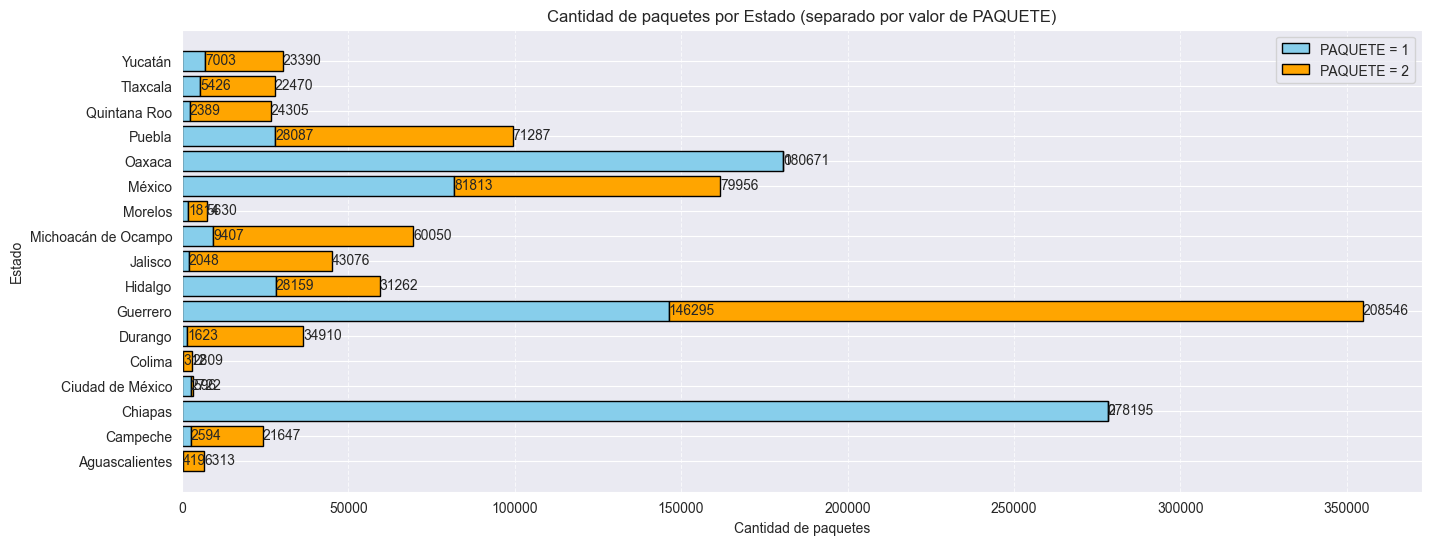

In [80]:
# Filtrar los datos donde 'PAQUETE' es 1 y 2
lista_productores_filtrada1 = lista_productores[lista_productores['PAQUETE'] == 1]
lista_productores_filtrada2 = lista_productores[lista_productores['PAQUETE'] == 2]

# Agrupar los datos filtrados por 'ESTADO' y contar el número de 'PAQUETE'
grouped_df1 = lista_productores_filtrada1.groupby("NOM_ENT")["PAQUETE"].count()
grouped_df2 = lista_productores_filtrada2.groupby("NOM_ENT")["PAQUETE"].count()

# Crear el gráfico de barras horizontal
plt.figure(figsize=(16, 6))

# Asegurarse de que los índices de los dos DataFrames son los mismos
index = np.union1d(grouped_df1.index, grouped_df2.index)
grouped_df1 = grouped_df1.reindex(index, fill_value=0)
grouped_df2 = grouped_df2.reindex(index, fill_value=0)

# Crear las barras para 'PAQUETE' igual a 1 y 2
barras1 = plt.barh(grouped_df1.index, grouped_df1.values, color='skyblue', edgecolor='black')
barras2 = plt.barh(grouped_df2.index, grouped_df2.values, color='orange', edgecolor='black', left=grouped_df1.values)

plt.xlabel('Cantidad de paquetes')
plt.ylabel('Estado')
plt.title('Cantidad de paquetes por Estado (separado por valor de PAQUETE)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(['PAQUETE = 1', 'PAQUETE = 2'])

# Añadir anotaciones a las barras
for bar1, bar2 in zip(barras1, barras2):
    plt.text(bar1.get_width(), bar1.get_y() + bar1.get_height()/2,
             f'{bar1.get_width():.0f}',
             va='center', ha='left')
    plt.text(bar1.get_width() + bar2.get_width(), bar2.get_y() + bar2.get_height()/2,
             f'{bar2.get_width():.0f}',
             va='center', ha='left')

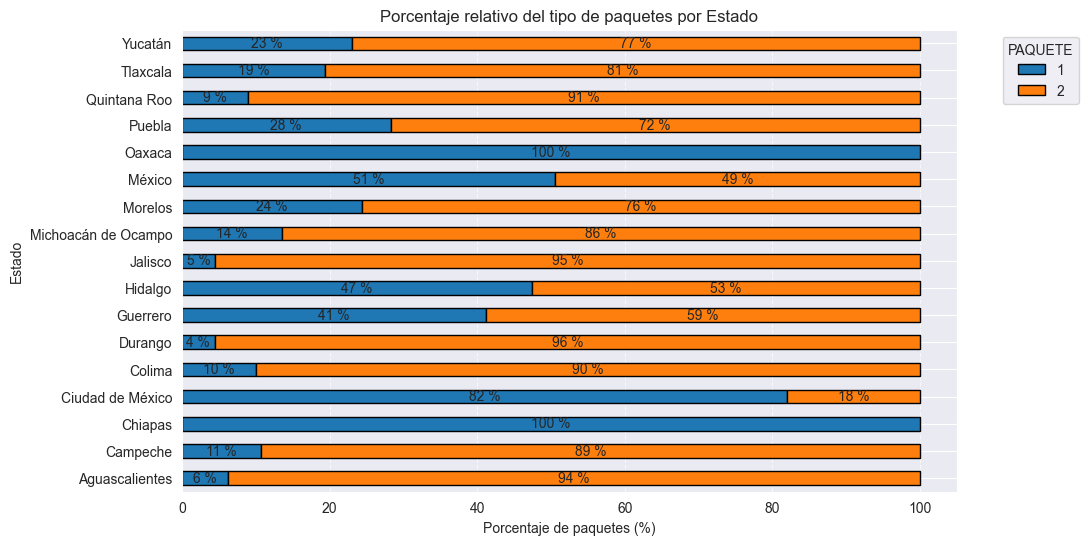

In [47]:
# Agrupar los datos por 'NOM_ENT' y 'PAQUETE', y contar el número de 'PAQUETE'
grouped_df = lista_productores.groupby(["NOM_ENT", "PAQUETE"]).size().unstack(fill_value=0)

# Calcular el porcentaje relativo de cada tipo de paquete por estado
percentage_df = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(10, 6))
percentage_df.plot(kind='barh', stacked=True, edgecolor='black', ax=ax)

plt.xlabel('Porcentaje de paquetes (%)')
plt.ylabel('Estado')
plt.title('Porcentaje relativo a la cantidad de paquetes solicitados por Estado')
plt.legend(title='PAQUETE', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir anotaciones a las barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if width > 0:
        ax.text(x+width/2, 
                y+height/2, 
                '{:.0f} %'.format(width), 
                horizontalalignment='center', 
                verticalalignment='center')

plt.show()

# 5. Análisis Multivariado

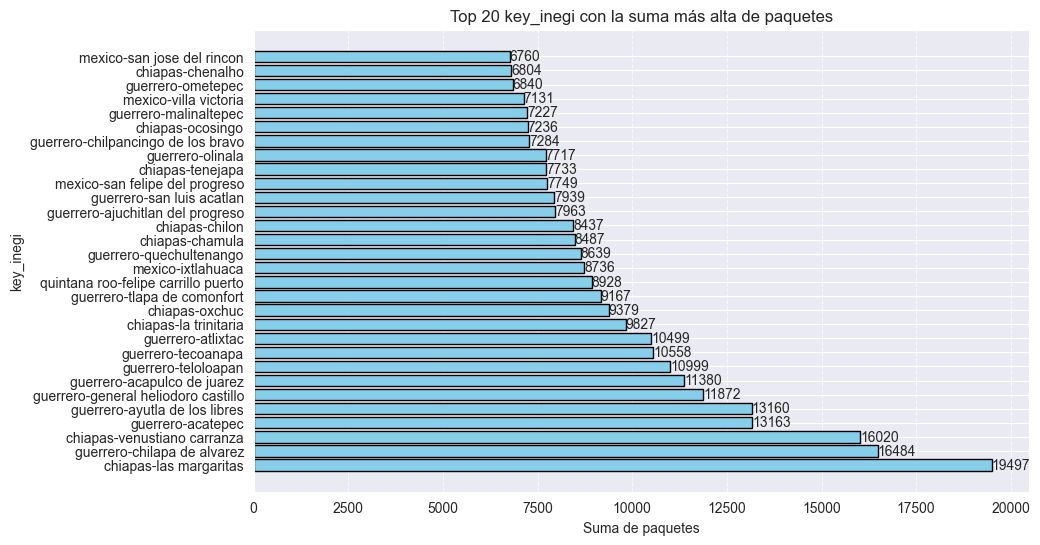

In [99]:
# Paquetes por municipio top20 
grouped_df = lista_productores.groupby("KEY_inegi")["PAQUETE"].count() 

# Ordenar los resultados en orden descendente y seleccionar los primeros 20
top20_df = grouped_df.sort_values(ascending=False).head(30)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
barras = plt.barh(top20_df.index, top20_df.values, color='skyblue', edgecolor='black')
plt.xlabel('Suma de paquetes')
plt.ylabel('key_inegi')
plt.title('Top 20 key_inegi con la suma más alta de paquetes')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir anotaciones a las barras
for bar in barras:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.0f}',
             va='center', ha='left')

plt.show()

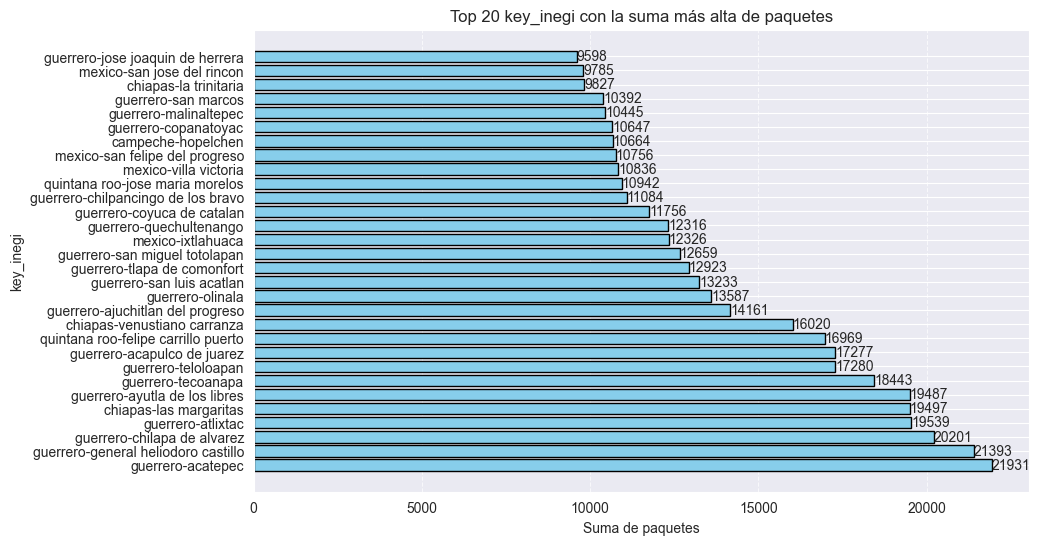

In [100]:
# Paquetes por municipio top20 
grouped_df = lista_productores.groupby("KEY_inegi")["PAQUETE"].sum()

# Ordenar los resultados en orden descendente y seleccionar los primeros 20
top20_df = grouped_df.sort_values(ascending=False).head(30)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
barras = plt.barh(top20_df.index, top20_df.values, color='skyblue', edgecolor='black')
plt.xlabel('Suma de paquetes')
plt.ylabel('key_inegi')
plt.title('Top 20 key_inegi con la suma más alta de paquetes')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir anotaciones a las barras
for bar in barras:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.0f}',
             va='center', ha='left')

plt.show()

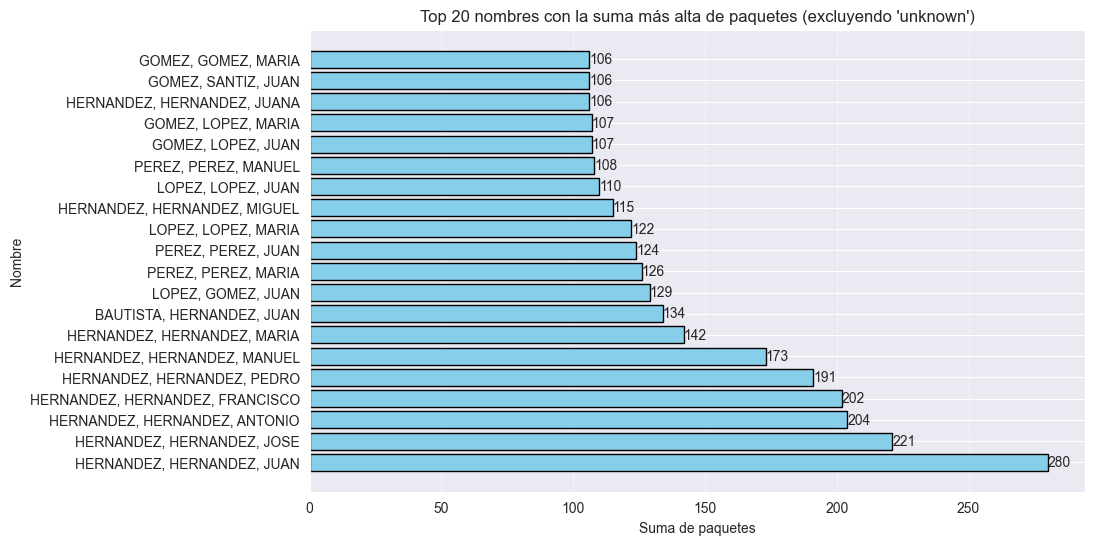

In [95]:
# Saber que personas tienen mas paquetes
# Agrupar los datos por 'APELLIDO PATERNO', 'APELLIDO MATERNO', 'NOMBRE (S)' y sumar el número de 'PAQUETE'
filtered_df = lista_productores.loc[(lista_productores["APELLIDO PATERNO"] != 'unknown') & 
                                    (lista_productores["APELLIDO MATERNO"] != 'unknown') & 
                                    (lista_productores["NOMBRE (S)"] != 'unknown')]

# Agrupar los datos filtrados por 'APELLIDO PATERNO', 'APELLIDO MATERNO', 'NOMBRE (S)' y sumar el número de 'PAQUETE'
grouped_df = filtered_df.groupby(["APELLIDO PATERNO", "APELLIDO MATERNO", "NOMBRE (S)"])["PAQUETE"].sum() # Mostrar sin key_inegi

# Ordenar los resultados en orden descendente y seleccionar los primeros 20
top20_df = grouped_df.sort_values(ascending=False).head(20)

# Convertir el índice multi-nivel a una cadena
top20_df.index = top20_df.index.map(lambda x: ', '.join(x))

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
barras = plt.barh(top20_df.index, top20_df.values, color='skyblue', edgecolor='black')
plt.xlabel('Suma de paquetes')
plt.ylabel('Nombre')
plt.title('Top 20 nombres con la suma más alta de paquetes (excluyendo \'unknown\')')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir anotaciones a las barras
for bar in barras:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.0f}',
             va='center', ha='left')

plt.show()

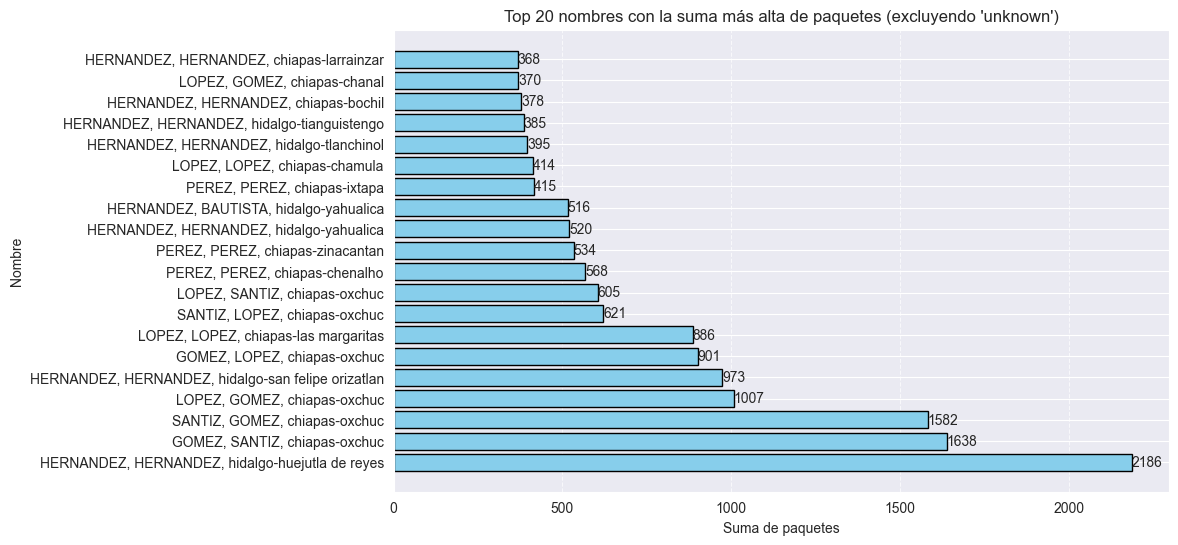

In [98]:
 # Coincidencias de APELLIDO PATERNO, APELLIDO MATERNO y MUNICIPIO (Familias)
# Saber que personas tienen mas paquetes
# Agrupar los datos por 'APELLIDO PATERNO', 'APELLIDO MATERNO', 'NOMBRE (S)' y sumar el número de 'PAQUETE'
filtered_df = lista_productores.loc[(lista_productores["APELLIDO PATERNO"] != 'unknown') & 
                                    (lista_productores["APELLIDO MATERNO"] != 'unknown')]

# Agrupar los datos filtrados por 'APELLIDO PATERNO', 'APELLIDO MATERNO', 'NOMBRE (S)' y sumar el número de 'PAQUETE'
grouped_df = filtered_df.groupby(["APELLIDO PATERNO", "APELLIDO MATERNO",'KEY_inegi'])["PAQUETE"].sum() # Mostrar sin key_inegi

# Ordenar los resultados en orden descendente y seleccionar los primeros 20
top20_df = grouped_df.sort_values(ascending=False).head(20)

# Convertir el índice multi-nivel a una cadena
top20_df.index = top20_df.index.map(lambda x: ', '.join(x))

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
barras = plt.barh(top20_df.index, top20_df.values, color='skyblue', edgecolor='black')
plt.xlabel('Suma de paquetes')
plt.ylabel('Nombre')
plt.title('Top 20 nombres con la suma más alta de paquetes (excluyendo \'unknown\')')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir anotaciones a las barras
for bar in barras:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.0f}',
             va='center', ha='left')

plt.show()